In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score,\
precision_recall_curve, roc_curve, roc_auc_score 

In [12]:
df = pd.read_csv('../Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data_x = df.iloc[:, :-1]
data_y = df["Outcome"]

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)


In [24]:
d_tree = DecisionTreeClassifier()

d_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [25]:
y_pred = d_tree.predict(test_x)

accuracy_score(test_y, y_pred)

0.6688311688311688

In [20]:
y_pred_prob = cross_val_predict(d_tree, train_x, train_y, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(train_y, y_pred_prob)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

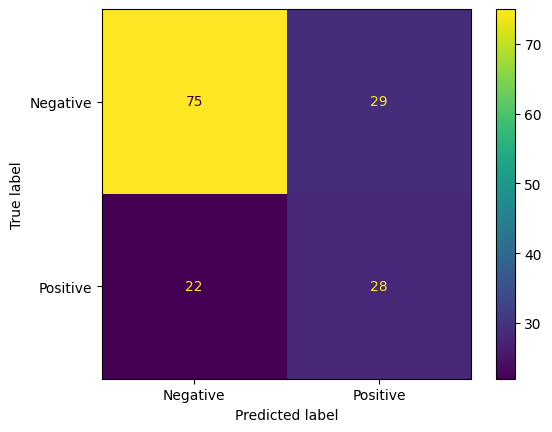

In [26]:
confusion_matrix(test_y, y_pred)
cfm = ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred), display_labels=["Negative", "Positive"])
cfm.plot()

In [27]:
## precision score
precision_score(test_y, y_pred)

0.49122807017543857

In [28]:
## recall_score
recall_score(test_y, y_pred)

0.56